# Telecommunication Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Display Formatting
from IPython.display import Markdown
import IPython.display as ipd
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

#Load the Cleaned Dataset

In [2]:
data=pd.read_csv('/content/drive/MyDrive/kaggle/churn/cleaned_churn_dataset.csv')
data_orig = pd.read_csv('/content/drive/MyDrive/kaggle/Dataset_ATS_v2.csv')
data_orig.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes
1,Male,0,No,41,Yes,No,DSL,One year,25,No
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No


## Feature Scaling for K-Means Clustering

In [3]:
# Separate features (drop target column since it's not used for clustering)
X = data.drop('Churn', axis=1)

# Scale features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
scaled_array = sc.transform(X)

# Create scaled DataFrame
scaled_data = pd.DataFrame(scaled_array, columns=X.columns)

# Save to CSV
scaled_data.to_csv("scaled-data.csv", index=False)

#sample of the scaled data
ipd.display(Markdown("### Sample of the Scaled Data"))
ipd.display(scaled_data.tail())


### Sample of the Scaled Data

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic
7038,0.990532,-0.439916,-0.654012,-1.277445,0.327438,1.170719,1.005042,1.944582,-0.562975,-0.885660
7039,-1.009559,-0.439916,1.529024,-0.381597,0.327438,1.170719,0.872106,1.944582,-0.562975,1.129102
7040,0.990532,-0.439916,1.529024,-0.829521,0.327438,-0.854176,-1.454286,-0.514249,-0.562975,-0.885660
7041,0.990532,2.273159,-0.654012,-0.829521,0.327438,1.170719,1.137979,-0.514249,-0.562975,1.129102
7042,0.990532,-0.439916,-0.654012,-0.259435,0.327438,-0.854176,-1.487520,-0.514249,1.776278,1.129102


## Identifying the Optimal Number of Clusters

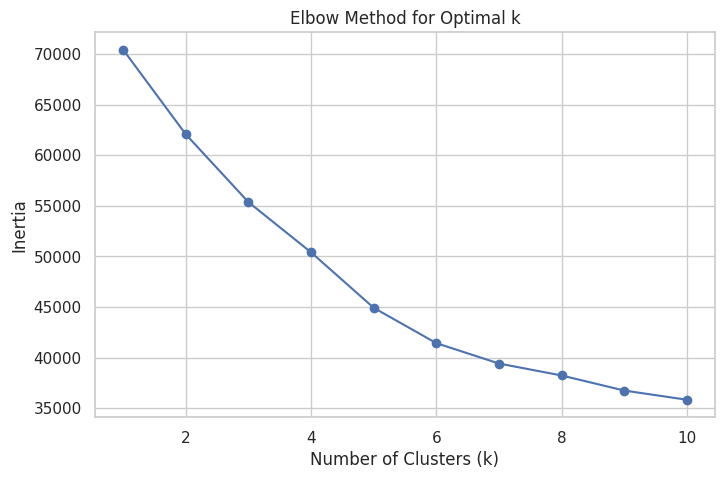

In [4]:
# Using scaled training features for clustering
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


## Training the K-Means Model

In [5]:
# The optimal number of clusters is 4
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model and predict cluster labels
clusters = kmeans_model.fit_predict(scaled_data)

# Add cluster labels to DataFrame
scaled_data['Cluster'] = clusters
data_orig['Cluster'] = clusters

ipd.display(Markdown("### Data with Cluster Labels"))
ipd.display(scaled_data.head())

ipd.display(Markdown("### Original Data with Cluster Labels"))
ipd.display(data_orig.head())

### Data with Cluster Labels

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,Cluster
0,-1.009559,-0.439916,-0.654012,-1.277445,-3.054010,-0.854176,-1.321350,-0.514249,-0.562975,-0.885660,2
1,0.990532,-0.439916,-0.654012,0.351370,0.327438,-0.854176,-1.321350,1.944582,-0.562975,-0.885660,1
2,-1.009559,-0.439916,1.529024,0.799294,0.327438,-0.854176,-1.520755,-0.514249,-0.562975,-0.885660,1
3,-1.009559,-0.439916,-0.654012,-1.277445,0.327438,-0.854176,0.373593,1.944582,-0.562975,-0.885660,1
4,0.990532,-0.439916,-0.654012,1.410099,0.327438,-0.854176,-0.457261,-0.514249,-0.562975,1.129102,1


### Original Data with Cluster Labels

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn,Cluster
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes,2
1,Male,0,No,41,Yes,No,DSL,One year,25,No,1
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No,1
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes,1
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No,1


## Display of Customers in Each Cluster

In [6]:
scaled_data['Cluster'].value_counts()

,count
Cluster,
1,2939
3,1891
0,1531
2,682


## Inspection Cluster Centroids

In [7]:
cluster_centers = pd.DataFrame(
    kmeans_model.cluster_centers_,
    columns=scaled_data.drop('Cluster', axis=1).columns
)
cluster_centers

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic
0,0.018574,-0.028791,-0.006658,0.006031,0.327438,0.178772,0.105961,-0.514249,1.776278,-0.381640
1,-0.024825,0.053957,-0.238797,-0.043891,0.327438,-0.619236,0.105232,0.207755,-0.562975,-0.437326
2,0.019813,-0.026192,0.005380,-0.025801,-3.054010,-0.082222,-0.755784,0.051787,-0.000457,0.003553
3,0.016400,-0.051105,0.374589,0.072637,0.327438,0.847335,0.023237,0.074778,-0.562975,0.987397


## Analysis of Churn rate

In [8]:
# Convert 'Yes' and 'No' in 'Churn' column to 1 and 0
data_orig['Churn'] = data_orig['Churn'].replace({'Yes': 1, 'No': 0})

# ---------- counts and proportions for all clusters ----------
total_churn_count = int(data_orig['Churn'].sum())

for cluster in sorted(data_orig['Cluster'].unique()):
    cluster_churn = data_orig.loc[(data_orig['Cluster'] == cluster) & (data_orig['Churn'] == 1)].shape[0]
    print(f"Churn in cluster {cluster}: {cluster_churn}")

print(f"Total churn: {total_churn_count}")

if total_churn_count:
    for cluster in sorted(data_orig['Cluster'].unique()):
        cluster_churn = data_orig.loc[(data_orig['Cluster'] == cluster) & (data_orig['Churn'] == 1)].shape[0]
        print(f"Proportion of churn in cluster {cluster}: {cluster_churn / total_churn_count:.2%}")


# ---------- summary table: size, churn count, churn rate per cluster ----------
summary = data_orig.groupby('Cluster').agg(
    size = ('Churn', 'size'),
    churn_count = ('Churn', 'sum'),
    churn_rate = ('Churn', 'mean')
).sort_index()

ipd.display(Markdown( "### Per-cluster summary:"))
ipd.display(summary)

Churn in cluster 0: 395
Churn in cluster 1: 848
Churn in cluster 2: 170
Churn in cluster 3: 456
Total churn: 1869
Proportion of churn in cluster 0: 21.13%
Proportion of churn in cluster 1: 45.37%
Proportion of churn in cluster 2: 9.10%
Proportion of churn in cluster 3: 24.40%


### Per-cluster summary:

,size,churn_count,churn_rate
Cluster,,,
0,1531,395,0.258001
1,2939,848,0.288534
2,682,170,0.249267
3,1891,456,0.241142


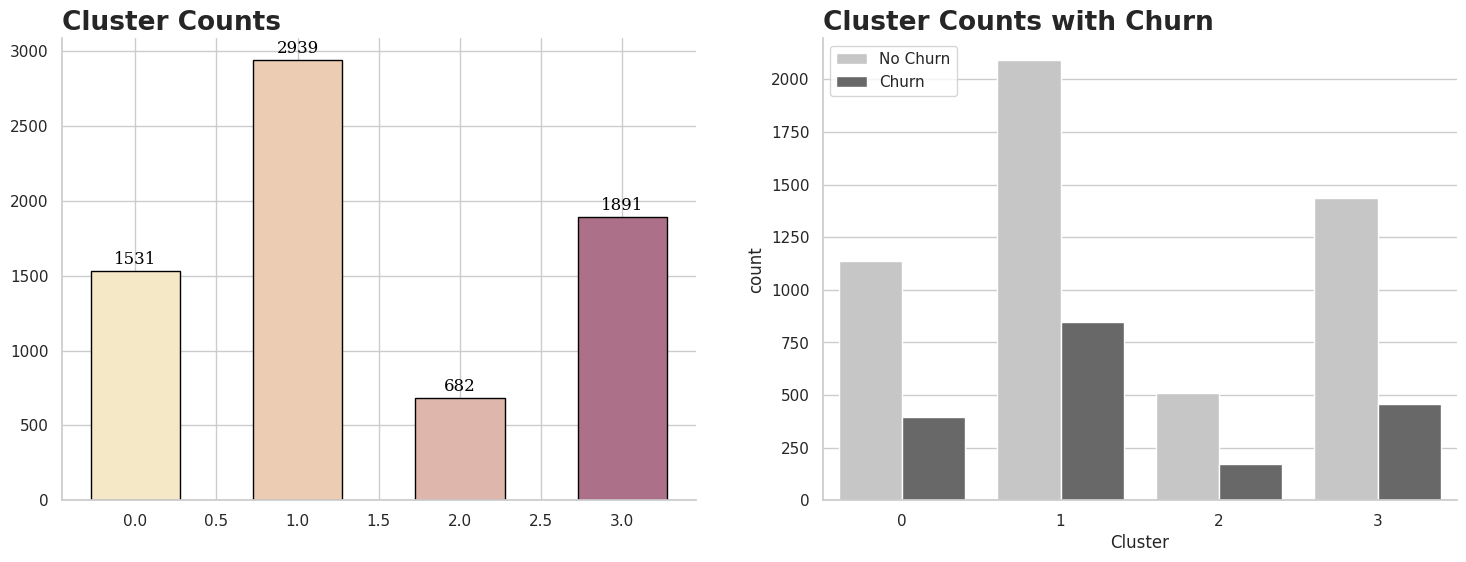

In [9]:
# Cluster Counts
fig, ax = plt.subplots(1,2, figsize=(18, 6))
data_temp = data_orig['Cluster'].value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088']
       ,width=0.55 )
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}",
                   xy=(i, data_temp[i] + 80),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)


sns.countplot(x='Cluster', hue="Churn", palette="Greys", data=data_orig, ax=ax[1])
ax[1].set_title('Cluster Counts with Churn', loc='left', fontsize=19, fontweight='bold')
sns.despine()
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.show()

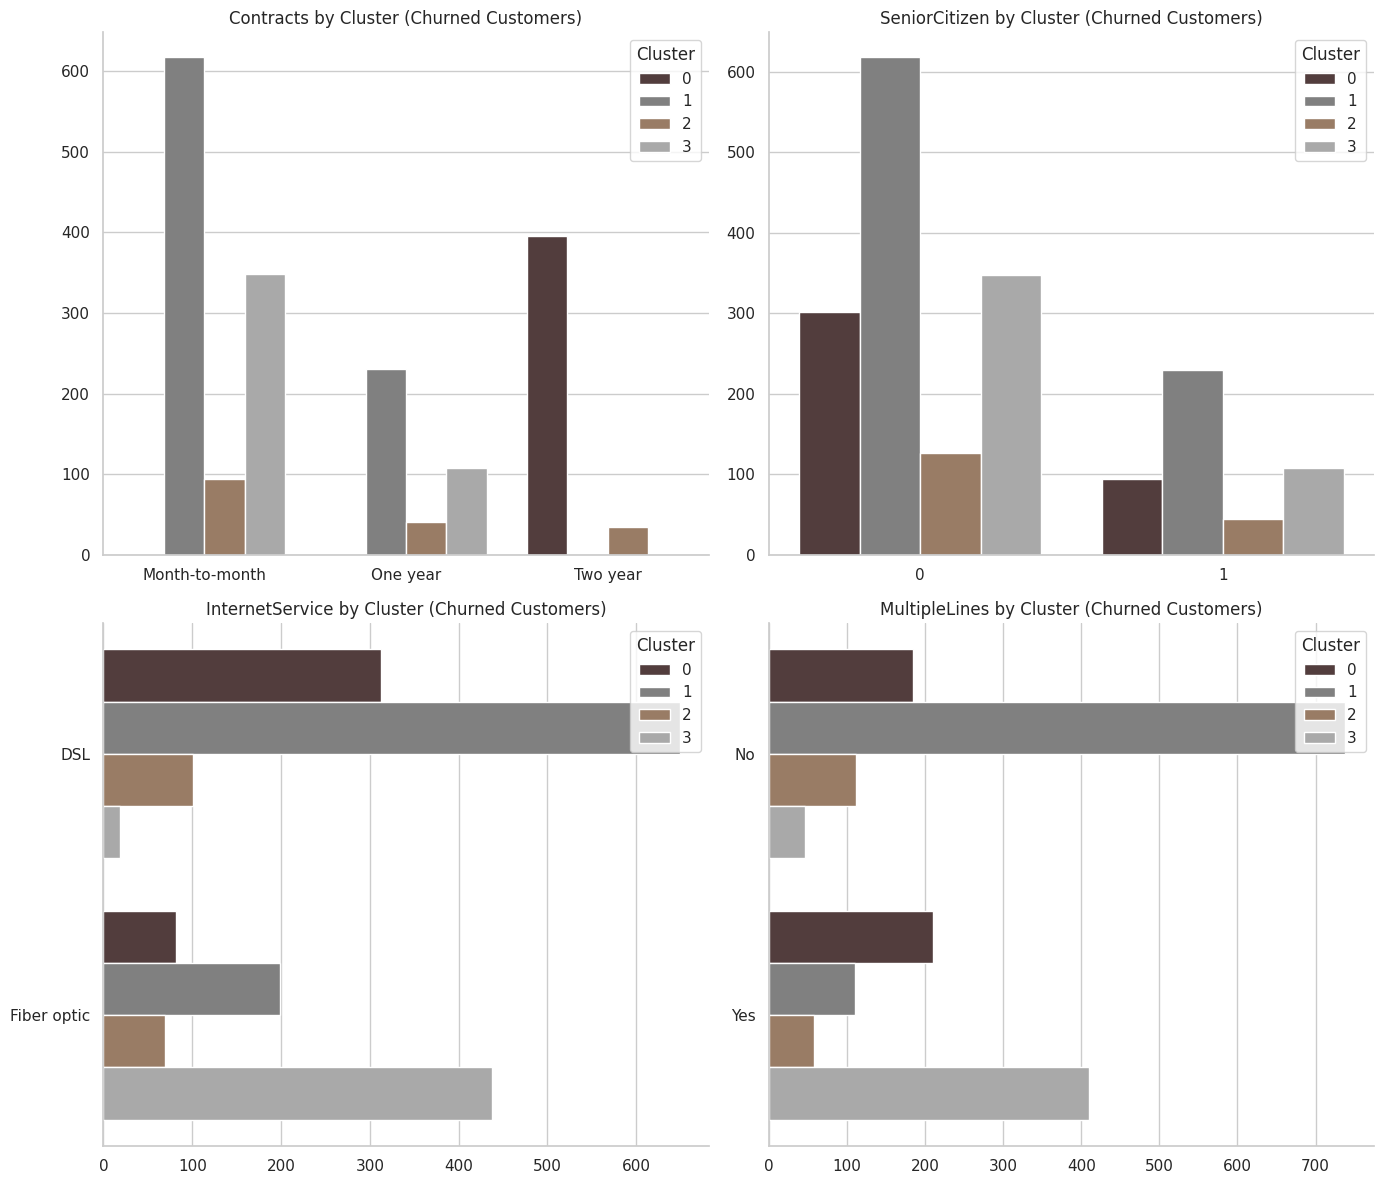

In [12]:
sns.set_style("whitegrid")
df_churn = data_orig[data_orig['Churn'] == 1].copy()

# Ensure Cluster is categorical so palette maps predictably
df_churn['Cluster'] = df_churn['Cluster'].astype('category')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
sns.despine()

# Gray for No Churn, highlight Churn colors kept for clusters
colors = ["#553939", "#808080", "#A27B5C", "#A9A9A9"]
sns.set_palette(sns.color_palette(colors))

sns.countplot(x="Contract", hue="Cluster", data=df_churn, ax=axes[0, 0])
axes[0, 0].set(title='Contracts by Cluster (Churned Customers)', xlabel=None, ylabel=None)

sns.countplot(x="SeniorCitizen", hue="Cluster", data=df_churn, ax=axes[0, 1])
axes[0, 1].set(title='SeniorCitizen by Cluster (Churned Customers)', xlabel=None, ylabel=None)

sns.countplot(y='InternetService', hue="Cluster", data=df_churn, ax=axes[1, 0])
axes[1, 0].set(title='InternetService by Cluster (Churned Customers)', xlabel=None, ylabel=None)

sns.countplot(y='MultipleLines', hue="Cluster", data=df_churn, ax=axes[1, 1])
axes[1, 1].set(title='MultipleLines by Cluster (Churned Customers)', xlabel=None, ylabel=None)

# Place a tidy legend on each subplot
for ax in axes.flatten():
    ax.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()

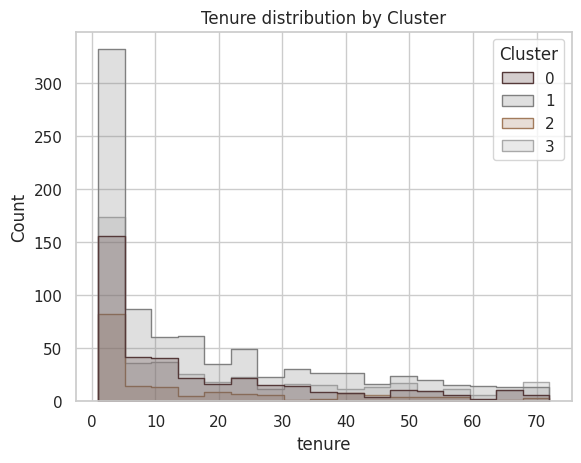

In [13]:
sns.histplot(data=df_churn, x="tenure", hue="Cluster", element="step")
plt.title('Tenure distribution by Cluster')
plt.show()

## Saving the K-means Model

In [ ]:
import joblib
joblib.dump(kmeans_model, 'kmeans_model.pkl')


## Visualising Clusters

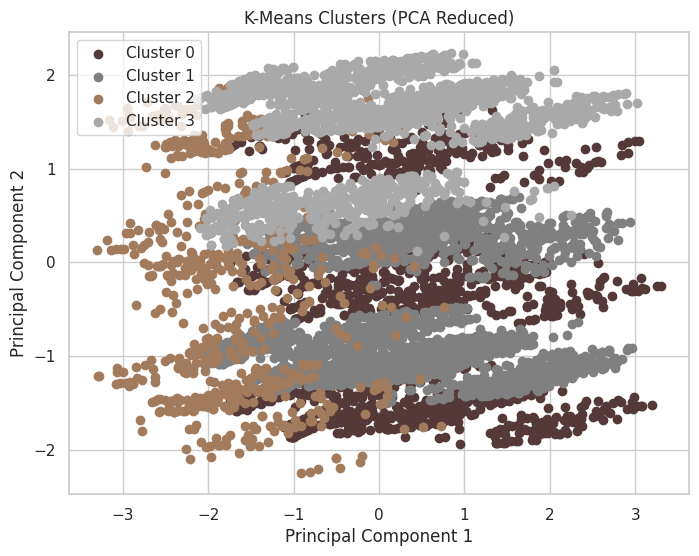

In [14]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
train_pca = pca.fit_transform(scaled_data.drop('Cluster', axis=1))

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=train_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}')

plt.title('K-Means Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()